/tmp/ipykernel_2011/3087406090.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


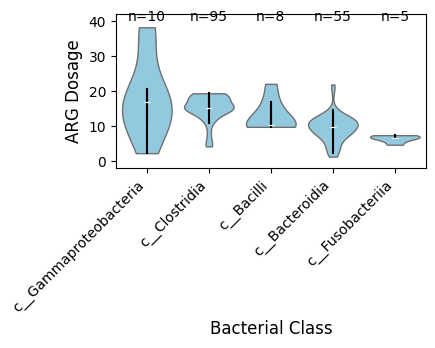

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.collections import PathCollection  # Added import

# Load data
input_path = "Figure_5E_data.csv"
df = pd.read_csv(input_path)

# 1. Extract class-level taxonomy
df['class'] = df['host_taxonomy'].apply(
    lambda x: x.split(';')[2] if len(x.split(';')) > 2 else 'Other'
)

# 2. Filter classes with >3 plasmids
class_counts = df.groupby('class')['ARG_dosage'].count()
valid_classes = class_counts[class_counts > 3].index
filtered_df = df[df['class'].isin(valid_classes)]

# 3. Sort classes by median ARG dosage (descending)
class_order = filtered_df.groupby('class')['ARG_dosage'].median().sort_values(ascending=False).index

# 4. Create plot with your specified styling
plt.figure(figsize=(4, 2))

# Calculate y-axis padding
y_padding = filtered_df['ARG_dosage'].max() * 0.05  # 5% padding

# Create violin plot
violin = sns.violinplot(
    data=filtered_df,
    x='class',
    y='ARG_dosage',
    order=class_order,
    color='skyblue',
    inner='box',        # Shows boxplot inside violin
    linewidth=1,
    cut=0,
    density_norm='width'
)

# 5. Customize median lines to black (corrected approach)
for element in violin.lines:
    if len(element.get_ydata()) > 1: 
        element.set_color('black')
        element.set_linewidth(1.5)

# 6. Add count annotations
counts = filtered_df.groupby('class').size()
for i, tax_class in enumerate(class_order):
    plt.text(i, filtered_df['ARG_dosage'].max() * 1.05, 
             f'n={counts[tax_class]}', 
             ha='center', 
             fontsize=10)

# 7. Formatting
plt.xlabel('Bacterial Class', fontsize=12)
plt.ylabel('ARG Dosage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(bottom=-y_padding, top=filtered_df['ARG_dosage'].max() * 1.1)
plt.grid(False)

# 8. Save outputs
# 8. Save outputs
plt.savefig('Figure_5F.pdf', dpi=1200, bbox_inches='tight')



plt.tight_layout()
plt.show()